# Travelers by time of day

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
# SOURCE: https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time
df = pd.read_csv('703288611_T_ONTIME_REPORTING.csv')
df.drop(['DISTANCE', 'FLIGHTS', 'DEST_CITY_NAME','ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME', 'QUARTER', 'Unnamed: 21', 'DEST_AIRPORT_ID', 'ORIGIN_STATE_ABR', 'DEST_STATE_ABR', 'DEP_DELAY', 'ARR_DELAY'], axis=1, inplace=True)

days = {1: 'Sun', 2: 'Mon', 3: 'Tue', 4: 'Wed', 5: 'Thu', 6: 'Fri', 7: 'Sat'}
df['DAY'] = [days[day] for day in df['DAY_OF_WEEK']]
df

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME,ARR_TIME,DAY
0,2020,1,1,3,ONT,SFO,1810,1851.0,1945,2053.0,Tue
1,2020,1,1,3,ONT,SFO,1150,1146.0,1320,1318.0,Tue
2,2020,1,1,3,ONT,SJC,2020,2016.0,2130,2124.0,Tue
3,2020,1,1,3,ONT,SJC,1340,1350.0,1455,1505.0,Tue
4,2020,1,1,3,ONT,SJC,915,916.0,1035,1023.0,Tue
...,...,...,...,...,...,...,...,...,...,...,...
607341,2020,1,18,6,ATL,SGF,2042,2039.0,2142,2128.0,Fri
607342,2020,1,19,7,ATL,SGF,2042,2041.0,2145,2135.0,Sat
607343,2020,1,20,1,ATL,SGF,2042,2038.0,2145,2132.0,Sun
607344,2020,1,21,2,ATL,SGF,2042,2052.0,2145,2150.0,Mon


In [74]:
df['DAY'].value_counts()

Thu    103812
Wed    103676
Tue     96799
Sun     82389
Sat     78506
Mon     76644
Fri     65520
Name: DAY, dtype: int64

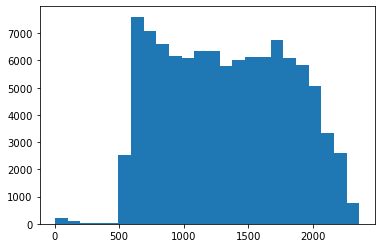

In [75]:
plt.hist(simple.loc[simple['day']=='Wed']['CRS_DEP_TIME'], bins=24)
#simple.loc[simple['day']=='Wed']['CRS_DEP_TIME'].plot.area()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

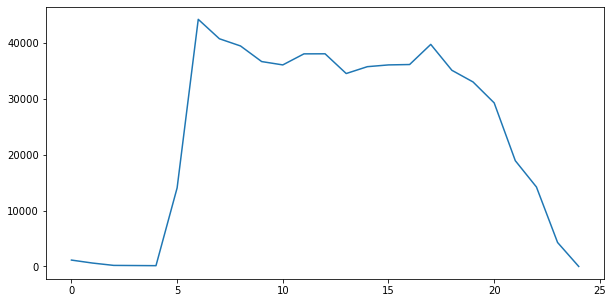

In [76]:
time = dict.fromkeys(range(25))
for key in time.keys():
    time[key] = 0

for flight in simple['CRS_DEP_TIME']:
    rounded = int(flight/100)
    time[rounded] += 1

plt.figure(figsize=(10,5))
plt.plot(list(time.keys()), list(time.values()))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

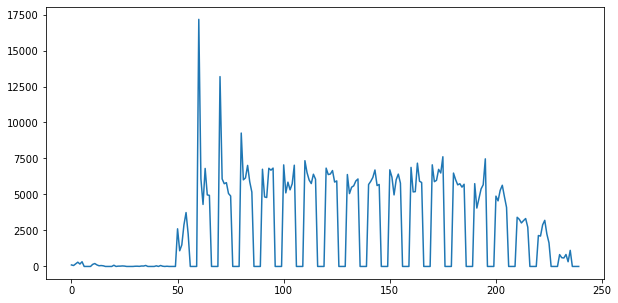

In [77]:
time = dict.fromkeys(range(240))
    
for key in time.keys():
    time[key] = 0

    
for flight in df['CRS_DEP_TIME']:
    rounded = int(flight/10)
    time[rounded] += 1

plt.figure(figsize=(10, 5))
plt.plot(list(temp.keys()), list(temp.values()))
plt.show

# Traveler Throughput

In [62]:
#Data source: https://www.tsa.gov/coronavirus/passenger-throughput

df_travelers = pd.read_csv('tsa_traveler_throughput.csv')
df_travelers['datetime'] = pd.to_datetime(df_travelers['date'])
df_travelers.drop('date', axis=1, inplace=True)

df_travelers

starting_date = pd.to_datetime('10/01/2020') #days
#int(str(pd.to_datetime('12/30/2020')-pd.to_datetime('12/29/2020')).split(' ')[0])


df_travelers.loc[df_travelers.datetime >= starting_date]

#df_travelers

plt.plot(df_travelers.datetime, df_travelers.travelers_2019)


days_of_week = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']



days = dict.fromkeys(days_of_week)
for day in days:
    days[day] = 0

for day in days:
    days[day] += df_travelers.loc[df_travelers['day'] == day, 'travelers_2020'].sum()
    
#plt.bar(list(days.keys()), list(days.values()))

#list(days.values())

#days.keys()

<BarContainer object of 3 artists>

ValueError: view limit minimum -36888.82000000001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units